## Multi-modal outputs: Image & Text

This notebook shows how non-text producing tools can be used to create multi-modal agents.

This example is limited to text and image outputs and uses UUIDs to transfer content across tools and agents. 

This example uses Steamship to generate and store generated images. Generated are auth protected by default. 

You can get your Steamship api key here: https://steamship.com/account/api

In [2]:
from steamship import Block, Steamship
import re
from IPython.display import Image

In [3]:
from langchain import OpenAI
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.tools import SteamshipImageGenerationTool

In [4]:
llm = OpenAI(temperature=0)

## Dall-E 

In [5]:
tools = [
    SteamshipImageGenerationTool(model_name= "dall-e")
]

In [6]:
mrkl = initialize_agent(tools, 
                        llm, 
                        agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, 
                        verbose=True)

In [7]:
output = mrkl.run("How would you visualize a parot playing soccer?")



> Entering new AgentExecutor chain...
 I need to generate an image of a parrot playing soccer.
Action: GenerateImage
Action Input: A parrot wearing a soccer uniform, kicking a soccer ball.
Observation: E28BE7C7-D105-41E0-8A5B-2CE21424DFEC
Thought: I now have the UUID of the generated image.
Final Answer: The UUID of the generated image is E28BE7C7-D105-41E0-8A5B-2CE21424DFEC.

> Finished chain.


In [8]:
def show_output(output):
    """Display the multi-modal output from the agent."""
    UUID_PATTERN = re.compile(
        r"([0-9A-Za-z]{8}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{12})"
    )

    outputs = UUID_PATTERN.split(output)
    outputs = [re.sub(r"^\W+", "", el) for el in outputs] # Clean trailing and leading non-word characters

    for output in outputs: 
        maybe_block_id = UUID_PATTERN.search(output)
        if maybe_block_id:
            display(Image(Block.get(Steamship(), _id=maybe_block_id.group()).raw()))
        else:
            print(output, end="\n\n")

The UUID of the generated image is 



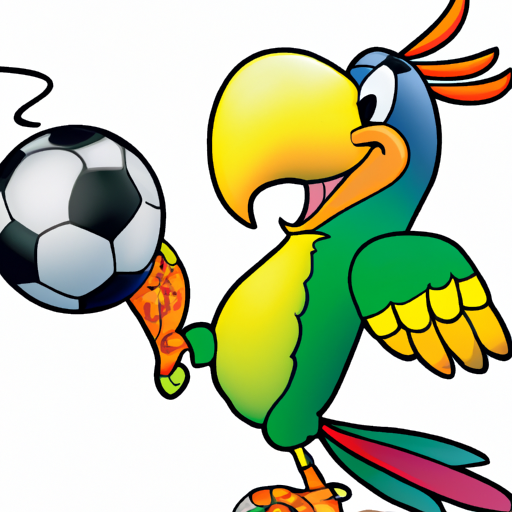

In [9]:
show_output(output)

## StableDiffusion 

In [10]:
tools = [
    SteamshipImageGenerationTool(model_name= "stable-diffusion")
]

In [11]:
mrkl = initialize_agent(tools, 
                        llm, 
                        agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, 
                        verbose=True)

In [12]:
output = mrkl.run("How would you visualize a parot playing soccer?")



> Entering new AgentExecutor chain...
 I need to generate an image of a parrot playing soccer.
Action: GenerateImage
Action Input: A parrot wearing a soccer uniform, kicking a soccer ball.
Observation: 25BB588F-85E4-4915-82BE-67ADCF974881
Thought: I now have the UUID of the generated image.
Final Answer: The UUID of the generated image is 25BB588F-85E4-4915-82BE-67ADCF974881.

> Finished chain.


The UUID of the generated image is 



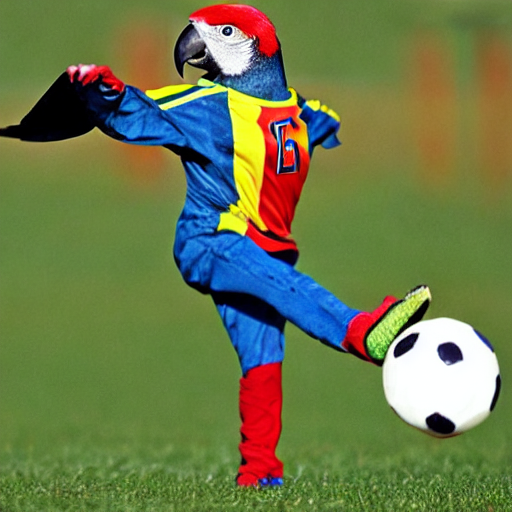

In [13]:
show_output(output)